C:\Anaconda\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
C:\Anaconda\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


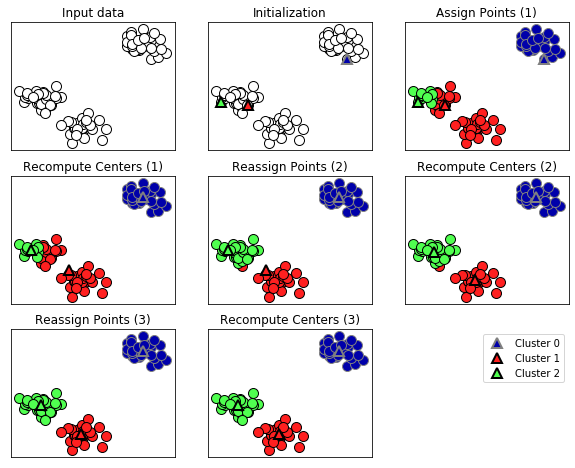

In [2]:
%matplotlib inline
import mglearn
mglearn.plots.plot_kmeans_algorithm() #kmeans 알고리즘 그래프

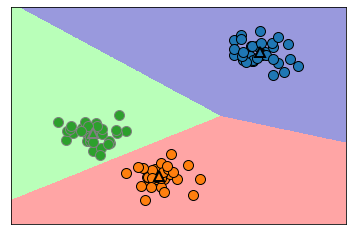

In [3]:
mglearn.plots.plot_kmeans_boundaries() #경계면 표시

In [4]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
X,y=make_blobs(random_state=10) #무작위 데이터셋
# print(X)
# print(y)
model=KMeans(n_clusters=3) #Kmeans 모형, n_clusters 군집갯수
model.fit(X) #비지도학습, 데이터만 입력(답을 입력하지 않음)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [5]:
lbl=model.labels_ #실제값
print(lbl)

[2 2 0 1 0 0 1 2 0 1 1 0 0 2 2 0 1 0 1 0 1 2 0 2 1 0 0 0 0 1 2 0 0 1 2 2 2
 0 0 0 2 1 2 2 0 1 1 1 2 1 0 2 1 1 2 1 0 2 1 1 0 0 2 2 2 1 1 2 2 2 0 1 0 0
 2 0 0 2 1 1 1 0 1 0 2 0 2 1 2 2 1 1 1 2 2 2 0 1 1 1]


In [6]:
pred=model.predict(X) #예측값
print(pred)

[2 2 0 1 0 0 1 2 0 1 1 0 0 2 2 0 1 0 1 0 1 2 0 2 1 0 0 0 0 1 2 0 0 1 2 2 2
 0 0 0 2 1 2 2 0 1 1 1 2 1 0 2 1 1 2 1 0 2 1 1 0 0 2 2 2 1 1 2 2 2 0 1 0 0
 2 0 0 2 1 1 1 0 1 0 2 0 2 1 2 2 1 1 1 2 2 2 0 1 1 1]


In [7]:
print(len(pred==lbl)/len(lbl)) #정확도

1.0


In [8]:
import sklearn.metrics as sm
sm.accuracy_score(lbl,pred)

1.0

In [9]:
#중심좌표
model.cluster_centers_

array([[ 2.84050716,  4.85840422],
       [ 5.6183469 , -9.54288499],
       [ 0.08921213, -5.46441742]])

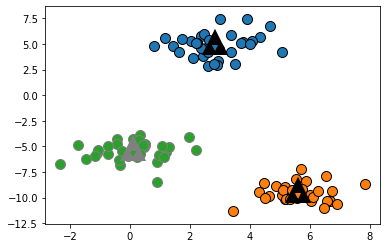

In [13]:
#클러스터링 결과를 산점도로 표현
mglearn.discrete_scatter(X[:,0],X[:,1],lbl,markers='o')
#중심좌표
mglearn.discrete_scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],
                        [0,1,2],markers='^',markeredgewidth=10)

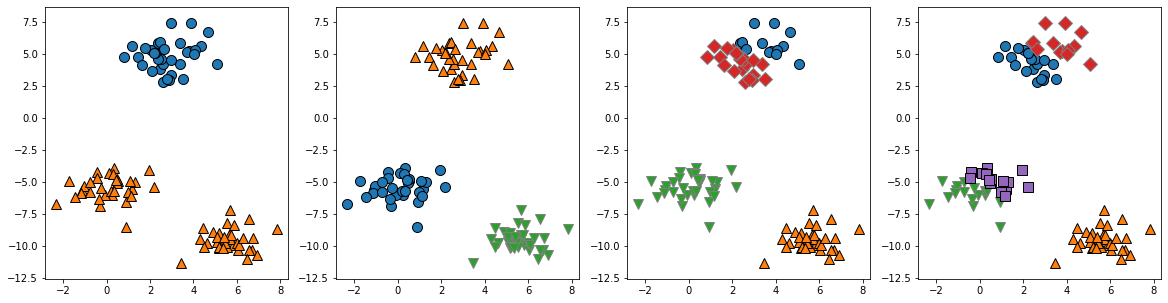

In [16]:
#군집갯수에 따른 산점도 비교
import matplotlib.pyplot as plt
#서브플롯(1행4열)
fig,axes=plt.subplots(1,4,figsize=(20,5))
idx=0
for k in [2,3,4,5]:
    kmeans=KMeans(n_clusters=k) #k의 범위 2~5
    kmeans.fit(X)
    lbls=kmeans.labels_ #분류라벨
    mglearn.discrete_scatter(X[:,0],X[:,1],lbls,ax=axes[idx])
    idx+=1